In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
mat = loadmat("ex8data1.mat")
X = mat["X"]
Xval = mat["Xval"]
yval = mat["yval"]

Text(0, 0.5, 'Throughput (mb/s)')

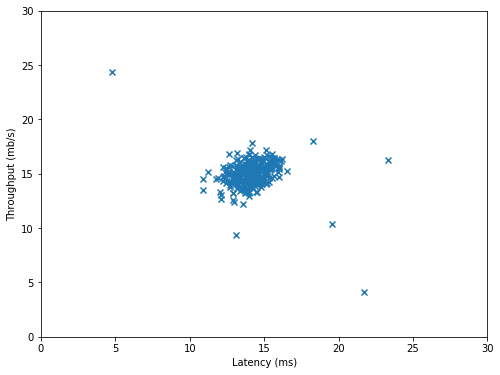

In [2]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],marker="x")
plt.xlim(0,30)
plt.ylim(0,30)
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")

### Mean is 'mu' and variance is 'sigma2' (as sigma square)

In [3]:
def estimateGaussian(X):
    """
     This function estimates the parameters of a Gaussian distribution using the data in X
    """
    
    sampleCount = X.shape[0]
    
    #compute mean
    totalValueColumWise = np.sum(X,axis=0)
    mean = 1/sampleCount *totalValueColumWise
    
    #compute variance
    variance = 1/mean * np.sum((X - sampleCount)**2,axis=0)
    
    return mean,variance

mean, variance = estimateGaussian(X)

In [4]:
print("Mean :: ",mean)
print("Variance :: ",variance)

Mean ::  [14.11222578 14.99771051]
Variance ::  [1866184.70003303 1745398.62985368]


### Get Probability Density Function

In [5]:
def multivariateGaussian(X, mu, sigma2):
    """
    Computes the probability density function of the multivariate gaussian distribution.
    """
    k = len(mu)
    
    sigma2=np.diag(sigma2)
    X = X - mu.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma2)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(sigma2) * X,axis=1))
    return p

p = multivariateGaussian(X, mean, variance)

/home/sachin/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Text(0, 0.5, 'Throughput (mb/s)')

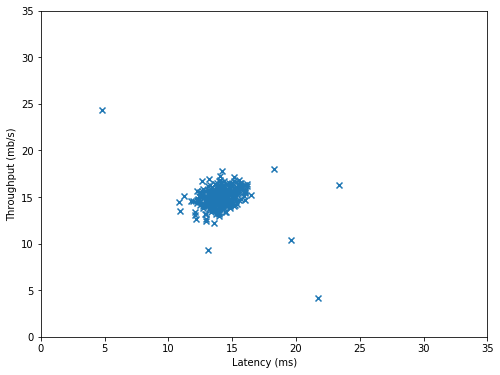

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],marker="x")
X1,X2 = np.meshgrid(
                    np.linspace(0,35,num=70),
                    np.linspace(0,35,num=70)
                )

p2 = multivariateGaussian(
    np.hstack(
        (X1.flatten()[:,np.newaxis],
         X2.flatten()[:,np.newaxis]
        )
    ), mean, variance)

contour_level = 10**np.array([np.arange(-20,0,3,dtype=np.float)]).T

plt.contour(X1,X2,p2[:,np.newaxis].reshape(X1.shape),contour_level)

plt.xlim(0,35)

plt.ylim(0,35)

plt.xlabel("Latency (ms)")

plt.ylabel("Throughput (mb/s)")

In [7]:
def selectThreshold(yval, pval):
    """
    Find the best threshold (epsilon) to use for selecting outliers
    """
    best_epi = 0
    best_F1 = 0
    
    stepsize = (max(pval) -min(pval))/1000
    epi_range = np.arange(pval.min(),pval.max(),stepsize)
    for epi in epi_range:
        predictions = (pval<epi)[:,np.newaxis]
        tp = np.sum(predictions[yval==1]==1)
        fp = np.sum(predictions[yval==0]==1)
        fn = np.sum(predictions[yval==1]==0)
        
        # compute precision, recall and F1
        prec = tp/(tp+fp)
        rec = tp/(tp+fn)
        
        F1 = (2*prec*rec)/(prec+rec)
        
        if F1 > best_F1:
            best_F1 =F1
            best_epi = epi
        
    return best_epi, best_F1

pval = multivariateGaussian(Xval, mean, variance)
epsilon, F1 = selectThreshold(yval, pval)
print("Best epsilon found using cross-validation:",epsilon)
print("Best F1 on Cross Validation Set:",F1)

Best epsilon found using cross-validation: 8.81844213527655e-08
Best F1 on Cross Validation Set: 0.8750000000000001


/home/sachin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars


Text(0, 0.5, 'Throughput (mb/s)')

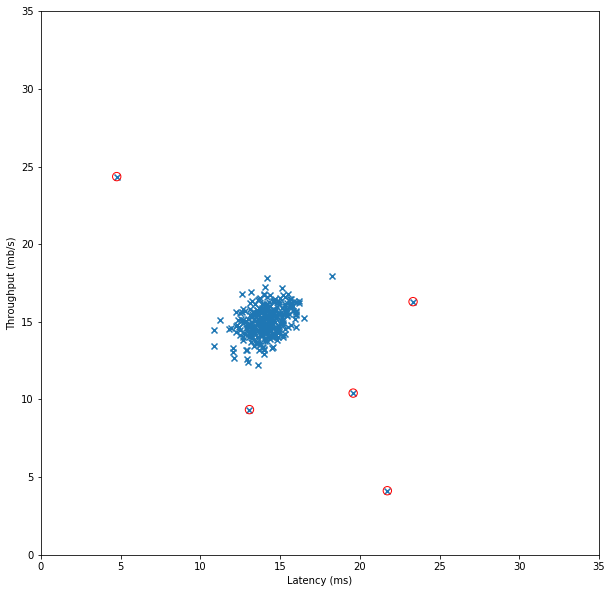

In [8]:
plt.figure(figsize=(10,10))

# plot the data
plt.scatter(X[:,0],X[:,1],marker="x")

# potting of contour
X1,X2 = np.meshgrid(np.linspace(0,35,num=70),np.linspace(0,35,num=70))

p2 = multivariateGaussian(
                            np.hstack(
                                        (
                                         X1.flatten()[:,np.newaxis],
                                         X2.flatten()[:,np.newaxis]
                                        )
                                     ), 
                            mean, variance
                         )


contour_level = 10**np.array([np.arange(-20,0,3,dtype=np.float)]).T

plt.contour(X1,X2,p2[:,np.newaxis].reshape(X1.shape),contour_level)


# Circling of anomalies
outliers = np.nonzero(p < epsilon)[0]

plt.scatter(X[outliers,0],X[outliers,1],marker ="o",facecolor="none",edgecolor="r",s=70)

plt.xlim(0,35)
plt.ylim(0,35)

plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")


### Multivariate Data  : Anomaly detection

In [11]:
mat2 = loadmat("ex8data2.mat")
X2 = mat2["X"]
Xval2 = mat2["Xval"]
yval2 = mat2["yval"]

# compute the mean and variance
mu2, sigma2_2 = estimateGaussian(X2)

# Training set
p3 = multivariateGaussian(X2, mu2, sigma2_2)

# cross-validation set
pval2 = multivariateGaussian(Xval2, mu2, sigma2_2)

# Find the best threshold
epsilon2, F1_2 = selectThreshold(yval2, pval2)

print("Best epsilon found using cross-validation:",epsilon2)
print("Best F1 on Cross Validation Set:",F1_2)
print("# Outliers found:",np.sum(p3<epsilon2))

/home/sachin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


ValueError: arange: cannot compute length

In [ ]:
mat3 = loadmat("ex8_movies.mat")
mat4 = loadmat("ex8_movieParams.mat")
Y = mat3["Y"] # 1682 X 943 matrix, containing ratings (1-5) of 1682 movies on 943 user
R = mat3["R"] # 1682 X 943 matrix, where R(i,j) = 1 if and only if user j give rating to movie i
X = mat4["X"] # 1682 X 10 matrix , num_movies X num_features matrix of movie features
Theta = mat4["Theta"] # 943 X 10 matrix, num_users X num_features matrix of user features
# Compute average rating 
print("Average rating for movie 1 (Toy Story):",np.sum(Y[0,:]*R[0,:])/np.sum(R[0,:]),"/5")

In [ ]:
plt.figure(figsize=(8,16))
plt.imshow(Y)
plt.xlabel("Users")
plt.ylabel("Sleep Hours")


In [ ]:
def  cofiCostFunc(params, Y, R, num_users, Num_Hours, num_features, Lambda):
    """
    Returns the cost and gradient for the collaborative filtering problem
    """
    
    # Unfold the params
    X = params[:num_movies*num_features].reshape(num_movies,num_features)
    Theta = params[num_movies*num_features:].reshape(num_users,num_features)
    
    predictions =  X @ Theta.T
    err = (predictions - Y)
    J = 1/2 * np.sum((err**2) * R)
    
    #compute regularized cost function
    reg_X =  Lambda/2 * np.sum(Theta**2)
    reg_Theta = Lambda/2 *np.sum(X**2)
    reg_J = J + reg_X + reg_Theta
    
    # Compute gradient
    X_grad = err*R @ Theta
    Theta_grad = (err*R).T @ X
    grad = np.append(X_grad.flatten(),Theta_grad.flatten())
    
    # Compute regularized gradient
    reg_X_grad = X_grad + Lambda*X
    reg_Theta_grad = Theta_grad + Lambda*Theta
    reg_grad = np.append(reg_X_grad.flatten(),reg_Theta_grad.flatten())
    
    return J, grad, reg_J, reg_grad

In [ ]:
# Reduce the data set size to run faster
num_users, num_movies, num_features = 4,5,3
X_test = X[:num_movies,:num_features]
Theta_test= Theta[:num_users,:num_features]
Y_test = Y[:num_movies,:num_users]
R_test = R[:num_movies,:num_users]
params = np.append(X_test.flatten(),Theta_test.flatten())
# Evaluate cost function
J, grad = cofiCostFunc(params, Y_test, R_test, num_users, num_movies, num_features, 0)[:2]
print("Cost at loaded parameters:",J)
J2, grad2 = cofiCostFunc(params, Y_test, R_test, num_users, num_movies, num_features, 1.5)[2:]
print("Cost at loaded parameters (lambda = 1.5):",J2)

In [ ]:
# load movie list
movieList = open("movie_ids.txt","r").read().split("\n")[:-1]
# see movie list
np.set_printoptions(threshold=np.nan)
movieList